### Analyzing Netflix Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\anime\OneDrive\Desktop\DA Practice\Netflix Dataset\netflix_titles.csv')

# Display first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Understanding The Data Structure 

#Check Shape of Dataset
print("Rows and Columns : ",df.shape)
#Checking Data Type and missing Value
df.info()
#Basic Statistics (Only on Numeric Columns,but useful check)
df.describe(include='all')

Rows and Columns :  (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False, errors='coerce')

# Create new columns: year and month of addition
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing 'country' and 'rating' with placeholder
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [5]:
# Overview of Dataset

#How many rows and columns?
print("Shape of dataset: ",df.shape)

#first few records
df.head()
#Column data types and non null info 
df.info()
#Count of missing values per column
df.isnull().sum()

Shape of dataset:  (8807, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
mem

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

C:\Users\anime\AppData\Local\Temp\ipykernel_6920\3000212307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='pastel')


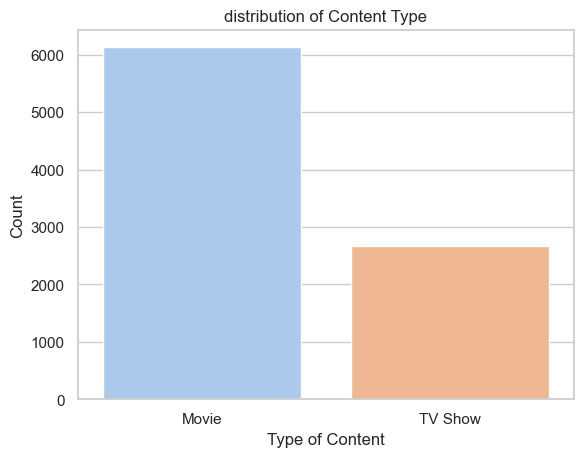

In [6]:
# Content Type Distribution (Movies vs TV Shows)
sns.set(style="whitegrid")
#countplot of content types
sns.countplot(data=df,x='type',palette='pastel')
plt.title("distribution of Content Type")
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

C:\Users\anime\AppData\Local\Temp\ipykernel_6920\130848812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['year_added']=df_year['year_added'].astype(int)
C:\Users\anime\AppData\Local\Temp\ipykernel_6920\130848812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_year,x='year_added',palette='viridis', order=sorted(df_year['year_added'].unique()))


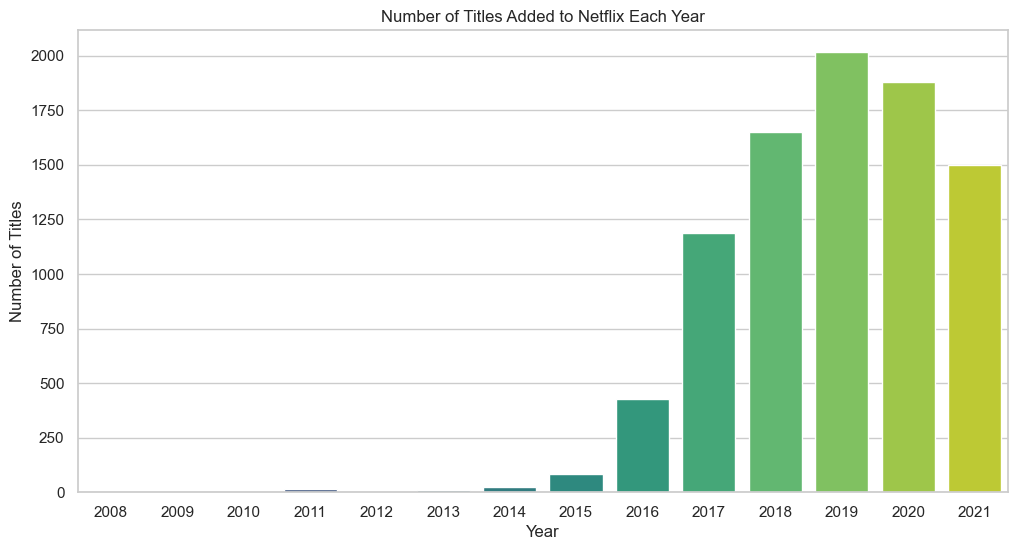

In [7]:
#Drop rows with missing year_added
df_year=df.dropna(subset=['year_added'])

#Coonvert year to int for consistency
df_year['year_added']=df_year['year_added'].astype(int)

#Countplot of contetent added by year 
plt.figure(figsize=(12,6))
sns.countplot(data=df_year,x='year_added',palette='viridis', order=sorted(df_year['year_added'].unique()))
# plt.xticks(rotation=45)
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

C:\Users\anime\AppData\Local\Temp\ipykernel_6920\2477059741.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='rocket')


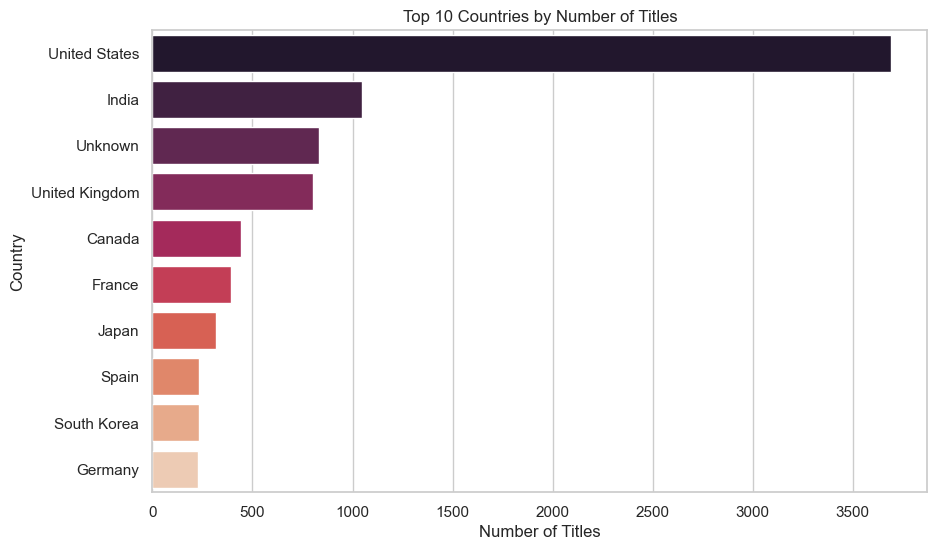

In [8]:
#Top 10 Countries Producing Netflix Content

#Split multiple countries and count
country_series=df['country'].dropna().str.split(', ').explode()
top_countries = country_series.value_counts().head(10)

#Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values,y=top_countries.index,palette='rocket')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

C:\Users\anime\AppData\Local\Temp\ipykernel_6920\417621150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index[:10],palette='coolwarm')


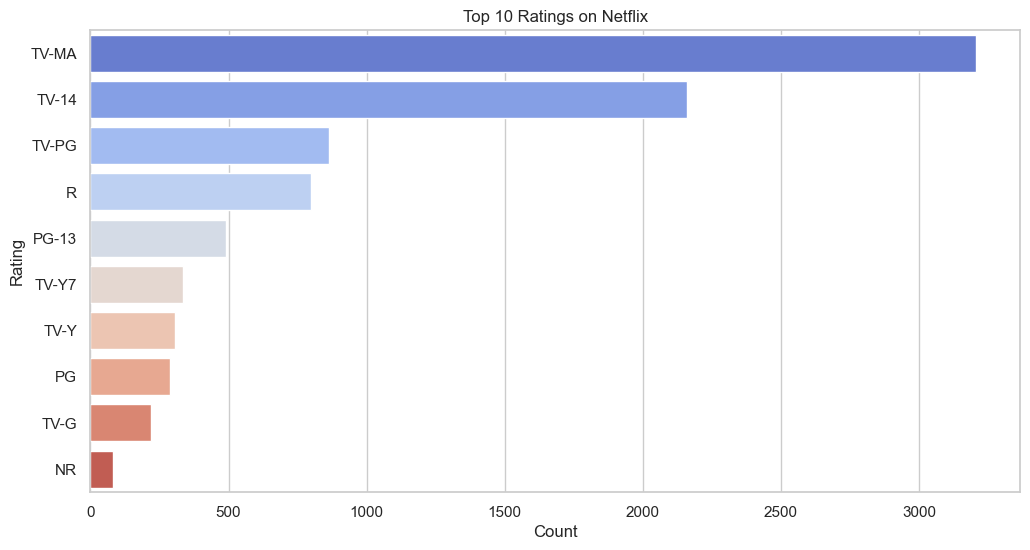

In [9]:
#Distribution of Ratings

plt.figure(figsize=(12,6))
sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index[:10],palette='coolwarm')
plt.title('Top 10 Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anime\AppData\Local\Temp\ipykernel_6920\1893950529.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)


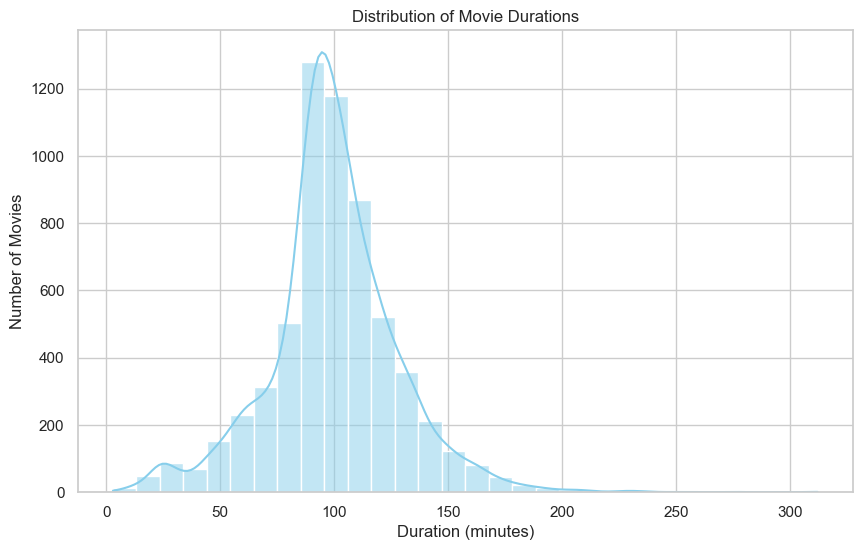

In [10]:
# Filter only Movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration in minutes
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()



<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anime\AppData\Local\Temp\ipykernel_6920\844475484.py:5: SyntaxWarning: invalid escape sequence '\d'
  tv_df['num_seasons'] = tv_df['duration'].str.extract('(\d+)').astype(int)
C:\Users\anime\AppData\Local\Temp\ipykernel_6920\844475484.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_df, x='num_seasons', palette='cool')


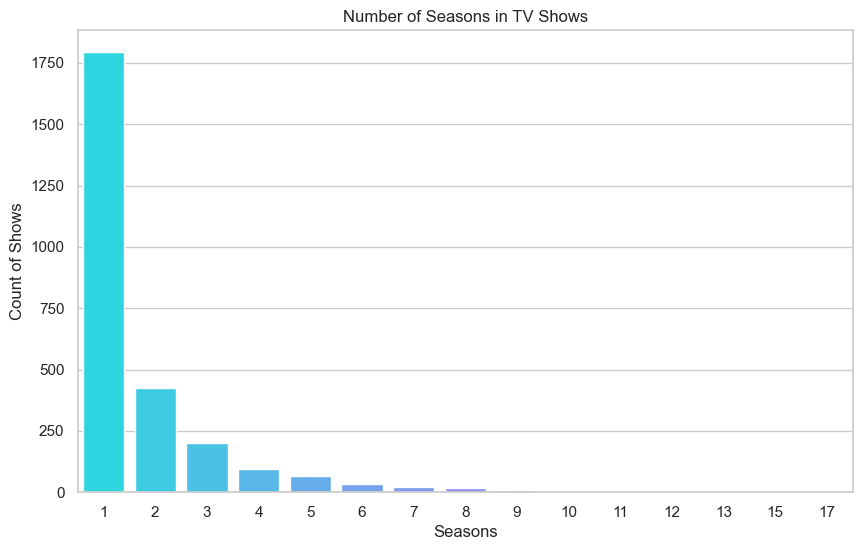

In [11]:
# Filter only TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons
tv_df['num_seasons'] = tv_df['duration'].str.extract('(\d+)').astype(int)

# Countplot
plt.figure(figsize=(10,6))
sns.countplot(data=tv_df, x='num_seasons', palette='cool')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Count of Shows')
plt.show()


C:\Users\anime\AppData\Local\Temp\ipykernel_6920\3193503199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


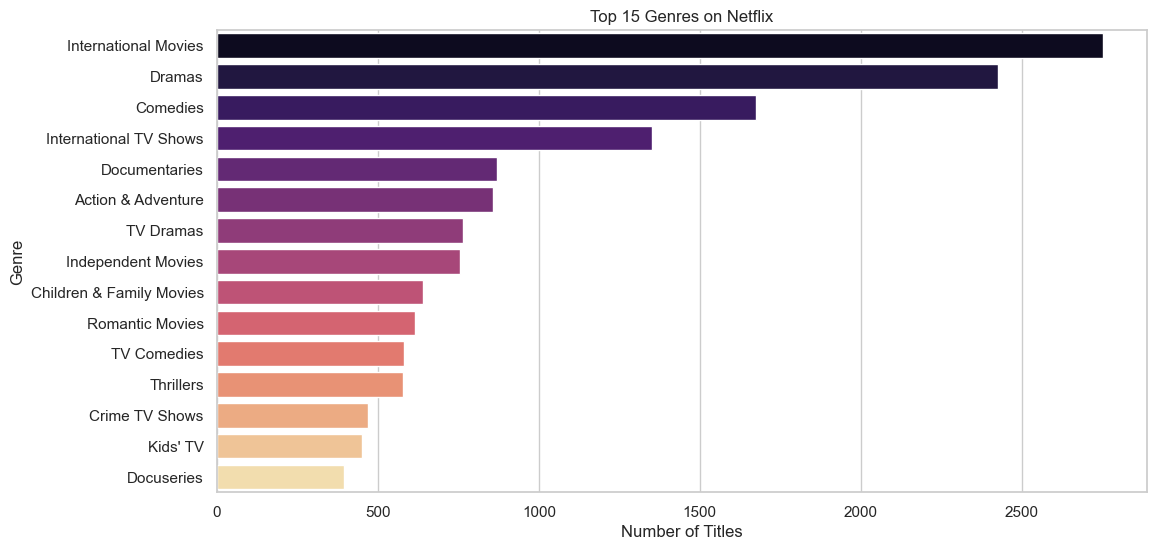

In [12]:
# Split and explode genres
genre_series = df['listed_in'].str.split(', ').explode()

# Count top 15 genres
top_genres = genre_series.value_counts().head(15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


C:\Users\anime\AppData\Local\Temp\ipykernel_6920\2057509117.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index, palette='Blues_d')
C:\Users\anime\AppData\Local\Temp\ipykernel_6920\2057509117.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index, palette='Greens_d')


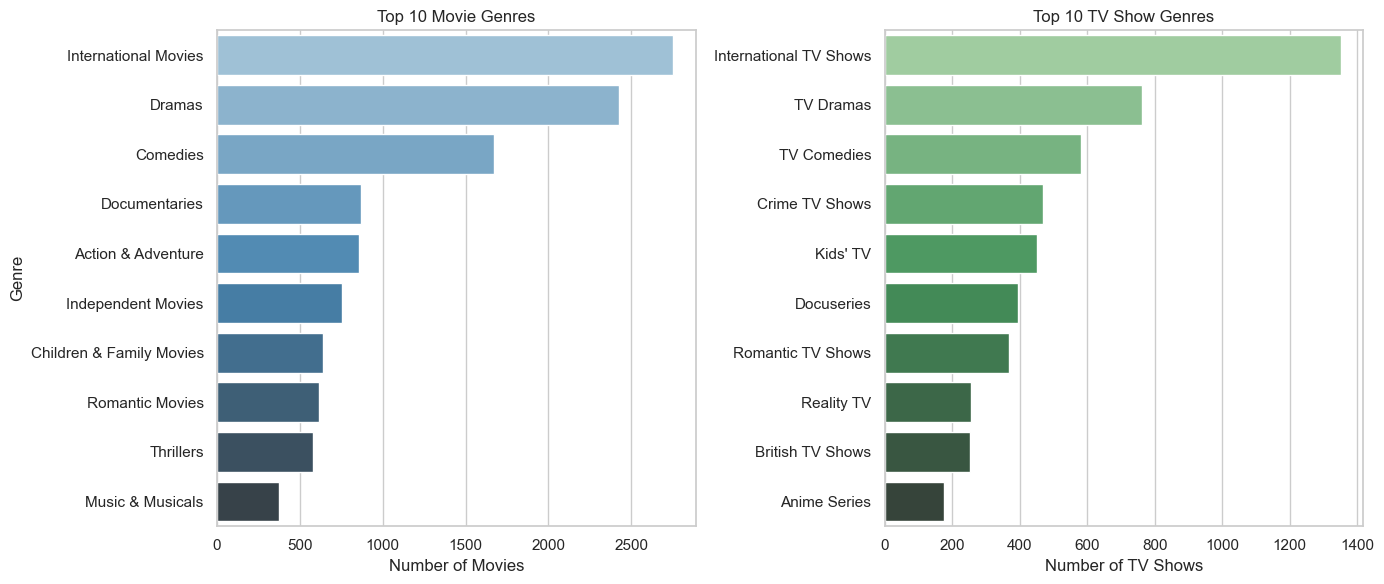

In [13]:
# Split data into Movies and TV Shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Explode genres
movie_genres = movies['listed_in'].str.split(', ').explode()
tv_genres = tv_shows['listed_in'].str.split(', ').explode()

# Get top 10 genres for each
top_movie_genres = movie_genres.value_counts().head(10)
top_tv_genres = tv_genres.value_counts().head(10)

# Plot: Movie Genres
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index, palette='Blues_d')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Plot: TV Show Genres
plt.subplot(1, 2, 2)
sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index, palette='Greens_d')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Number of TV Shows')
plt.ylabel('')

plt.tight_layout()
plt.show()